In [0]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [0]:
df = pd.read_csv('http://devanshushukla.com/hackveda.in/videos/PythonDataSets/creditcard.csv')


In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94060,64710.0,1.193804,0.612563,-0.391699,1.310212,0.191847,-0.795245,0.173843,-0.056250,0.040285,-0.699517,0.193712,-0.504428,-0.970582,-1.130519,1.439120,0.345688,1.223728,0.252926,-0.977834,-0.186880,-0.050353,-0.080610,-0.083367,-0.083709,0.588144,-0.294705,0.045905,0.052176,1.00,0
181684,125079.0,1.870561,-1.216993,-0.421048,-0.237150,-1.346126,-0.730402,-0.679897,-0.166534,-0.048815,0.749570,-0.979207,0.143578,0.474501,-0.188367,0.371050,-1.083394,-0.235592,0.853645,-0.841498,-0.337537,-0.547021,-1.286937,0.413728,-0.001245,-0.804212,0.217943,-0.036918,-0.016498,135.00,0
20161,30830.0,1.060675,-0.009434,-0.152834,1.018464,0.071873,-0.388889,0.387219,-0.263539,-0.093922,-0.065446,-0.990197,0.443106,1.226317,0.129307,0.922421,0.274176,-0.807176,0.156840,-0.175236,0.207868,0.170870,0.328590,-0.391251,-0.390326,0.866443,-0.183670,-0.002074,0.034878,130.00,0
48732,43761.0,1.243307,0.284293,-0.037865,0.616736,0.609837,0.717676,-0.044995,0.127347,-0.277153,0.085457,0.542953,1.183130,1.362033,0.226032,0.560043,0.442726,-1.018565,0.174236,0.063872,-0.042543,-0.068280,-0.106420,-0.167535,-1.332253,0.630747,-0.368481,0.043179,0.001605,2.95,0
43731,41633.0,0.967453,-0.049278,0.399435,1.208126,-0.491092,-0.830299,0.315096,-0.228098,-0.027948,-0.094606,-0.251891,0.476992,0.444006,0.294503,1.015718,0.230922,-0.499542,-0.354598,-0.334301,0.159926,-0.143889,-0.711319,-0.020700,0.365112,0.331890,-0.646678,0.001326,0.054240,139.13,0


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


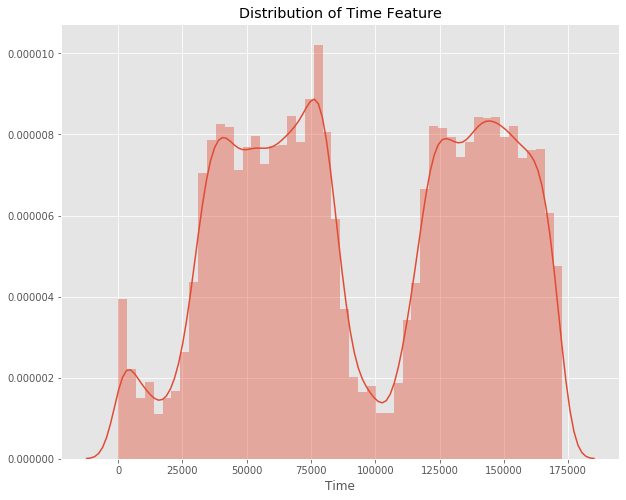

In [7]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

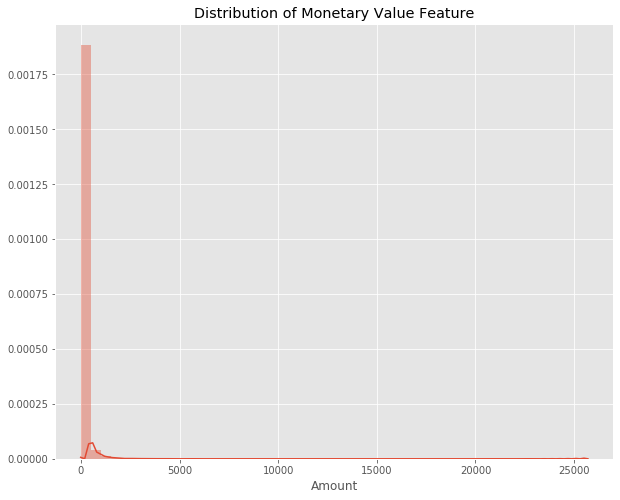

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [9]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

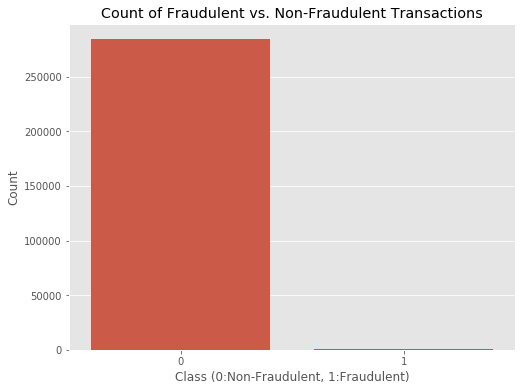

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [11]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,3.062e-02,-2.477e-01,1.243e-01,-6.590e-02,-9.876e-02,-1.835e-01,1.190e-02,-7.330e-02,9.044e-02,2.898e-02,-5.087e-02,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,7.434e-17,2.439e-16,2.422e-16,-2.115e-16,9.353e-16,-3.252e-16,6.309e-16,-5.012e-16,2.870e-16,1.818e-16,1.037e-16,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,-4.782e-16,9.469e-16,-6.588e-16,3.855e-16,-2.541e-16,2.831e-16,4.934e-17,-9.883e-16,2.637e-16,9.528e-17,-9.310e-16,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,6.289e-16,-5.502e-17,2.207e-16,-6.883e-16,4.271e-16,1.123e-16,1.183e-15,4.577e-17,5.428e-16,2.577e-16,-9.429e-16,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,6.055e-16,-2.084e-16,-5.658e-16,-1.506e-16,-8.522e-17,-1.508e-16,-6.939e-16,-4.398e-16,1.494e-16,-2.657e-16,-3.223e-16,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,-6.602e-16,7.343e-16,3.761e-16,-9.579e-16,-3.635e-16,-5.133e-16,-3.517e-16,1.426e-16,1.110e-15,-3.138e-16,2.076e-16,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,2.851e-16,4.866e-16,2.141e-16,-2.268e-16,3.453e-16,-6.368e-18,-2.478e-16,3.568e-16,2.811e-16,2.717e-16,1.899e-16,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,3.043e-17,-1.084e-15,1.510e-15,-9.892e-17,-1.729e-16,1.937e-17,2.894e-16,1.150e-15,-1.117e-16,-2.874e-16,1.744e-16,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,9.052e-17,1.955e-16,-6.266e-17,-2.383e-16,-1.131e-16,2.021e-16,5.027e-16,-3.509e-16,-4.094e-16,-5.340e-16,-1.096e-16,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,-2.772e-16,4.682e-16,-2.445e-15,-2.650e-16,2.343e-16,-1.588e-15,-3.252e-16,6.536e-16,1.204e-16,1.121e-16,-4.341e-16,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

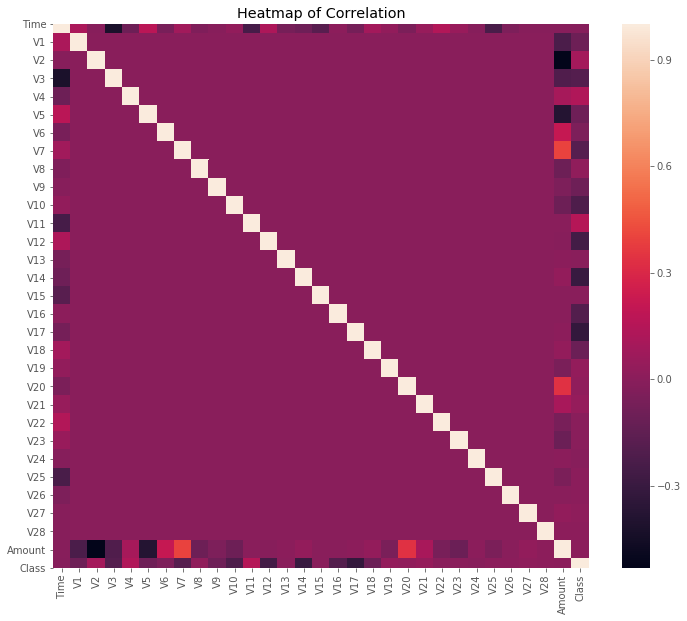

In [12]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [13]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [0]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [16]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
260424,159552.0,-0.646,1.470,1.931,4.327,-0.272,1.366,-0.238,0.531,-1.289,1.527,-1.487,-1.396,-0.939,0.129,1.203,0.437,0.056,0.600,1.105,0.055,0.006,-0.032,0.054,6.619e-01,-0.794,0.113,-0.338,-0.113,34.04,0,-0.217,1.363
177482,123194.0,-0.209,0.651,-0.432,-0.309,1.323,-1.027,1.212,-0.525,0.125,-0.693,-1.172,-0.905,-0.472,-0.945,0.842,0.126,0.125,0.987,0.193,-0.049,0.242,0.947,-0.351,-7.193e-01,-0.440,-0.158,-0.043,0.023,44.04,0,-0.177,0.598
185748,126808.0,-1.110,0.818,0.239,-1.807,-1.641,1.035,-3.758,-7.892,-1.136,-1.707,-1.341,0.144,-0.420,0.548,-0.788,1.949,0.242,-0.987,-0.924,1.838,-3.416,2.261,-0.053,4.892e-04,0.848,-0.019,0.068,0.288,78.29,0,-0.040,0.674
58134,48244.0,1.203,-0.017,-0.237,1.103,0.389,0.594,-0.005,0.136,0.572,-0.100,-1.999,-0.592,-1.126,0.237,0.148,-0.253,-0.173,-0.363,0.158,-0.163,-0.190,-0.431,-0.247,-1.353e+00,0.796,-0.224,0.024,0.004,38.83,0,-0.198,-0.981
193577,130197.0,-1.454,0.349,-2.742,0.138,1.357,-2.415,0.679,0.211,-0.470,-0.166,-1.209,0.754,0.568,1.348,-0.545,-1.050,0.209,-0.406,0.164,-0.151,0.554,1.703,-0.404,1.063e-01,-1.073,-0.141,0.649,-0.015,40.00,0,-0.193,0.745


In [0]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [18]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256153, 31)
Test Shape: (28654, 31)


In [0]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [20]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 442 fraudulent transactions in the train data.


In [0]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
77704,-0.809,-0.107,2.631,-1.960,-1.078,-0.022,-0.695,0.436,-0.746,0.205,0.606,-1.159,-1.258,-0.334,0.230,2.206,-0.552,0.238,-1.491e-04,0.206,0.458,1.170,-0.383,0.003,0.360,-0.102,0.299,0.120,0,-0.289,-0.707
70478,-6.696,5.132,-3.507,-1.795,-6.076,6.312,-2.146,-19.722,0.864,-0.050,0.388,1.287,-1.622,1.428,-0.248,2.006,0.098,0.174,-7.098e-01,-3.780,9.324,-4.792,-3.550,-0.322,-1.234,0.752,2.767,-0.137,0,5.653,-0.786
79489,-1.313,-0.337,-0.900,-3.388,0.477,3.318,-1.467,1.579,-2.432,0.700,-0.662,-0.929,0.565,0.100,0.288,0.620,-0.044,0.463,-5.000e-01,-0.608,-0.274,-0.998,-0.055,0.949,0.005,-0.579,-0.537,-0.285,0,-0.065,-0.688
57448,-1.023,-0.323,2.067,-1.593,-0.053,0.542,0.030,0.357,-1.480,-0.214,1.228,1.040,0.647,-0.304,-1.029,-1.948,0.422,0.113,-1.213e+00,-0.297,-0.466,-0.925,0.097,-0.279,-0.034,0.788,-0.015,0.047,0,-0.118,-0.925
122153,-1.253,1.315,0.723,-0.498,0.887,1.507,0.228,0.739,-0.028,0.399,2.168,0.736,-0.296,-0.282,1.390,-0.636,0.832,-1.490,-1.316e+00,0.354,-0.212,-0.233,0.104,-1.416,-0.314,0.219,0.624,0.272,0,-0.313,-0.283


In [0]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [24]:
subsample = pd.concat([selected, fraud])
len(subsample)

884

In [25]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.101,-1.675,-0.573,5.618,0.766,0.441,1.935,-1.020,-0.193,1.784,0.607,-2.854,2.379,1.268,-0.284,-0.482,0.811,-0.358,0.753,-0.038,-0.413,-0.209,0.345,1.091,-0.687,0.076,0.034,-0.833,1,2.186,0.333
1,-0.947,0.647,1.833,-0.598,0.348,0.218,0.443,0.277,-0.215,-0.689,0.925,0.965,0.433,0.002,-0.040,0.104,-0.633,0.412,0.726,0.320,-0.183,-0.537,-0.098,0.728,0.380,-0.498,0.291,0.140,0,-0.197,1.048
2,0.742,-1.086,1.725,1.768,-1.584,1.194,-1.205,0.565,1.763,-0.276,-0.265,0.863,-1.049,-0.833,-2.016,-0.032,-0.074,0.796,0.402,0.132,0.201,0.669,-0.343,0.043,0.506,-0.110,0.082,0.054,0,0.330,-1.294
3,-5.268,2.507,-5.291,4.886,-3.343,-1.100,-5.811,1.726,-0.749,-4.835,3.546,-7.751,-1.196,-10.019,0.296,-7.477,-9.786,-4.244,2.681,-0.286,0.764,0.473,0.548,-0.157,-0.710,-0.366,-1.487,0.678,1,-0.349,-0.684
4,0.210,0.640,-1.522,-1.583,3.271,3.243,0.561,0.701,-0.013,-0.591,0.227,-0.249,-0.459,-0.960,0.186,0.132,0.249,-0.403,-0.395,0.119,-0.386,-0.880,0.073,0.593,-0.450,0.136,0.082,-0.152,0,-0.342,1.247
5,-2.405,2.944,-7.617,3.533,-5.417,-0.113,-1.329,1.709,-2.323,-6.541,4.405,-4.938,-0.741,-7.463,0.535,-4.671,-4.472,-0.982,3.490,-0.339,0.653,0.414,0.024,-0.261,0.405,0.029,0.520,-0.470,1,2.316,1.053
6,0.929,-1.500,0.919,-0.569,-1.474,0.781,-1.302,0.474,-0.164,0.559,1.347,-0.362,-1.301,-0.138,0.341,0.876,0.712,-1.229,-0.015,0.241,0.492,1.110,-0.174,-0.266,0.174,-0.016,0.041,0.032,0,0.301,-1.395
7,2.204,-0.701,-1.245,-1.104,-0.386,-0.636,-0.564,-0.165,-0.782,1.018,1.168,0.260,0.518,0.079,-0.290,1.191,-0.177,-0.846,0.716,0.007,0.398,1.125,0.098,0.816,0.065,-0.093,-0.034,-0.065,0,-0.348,1.530
8,-1.088,0.888,1.326,0.181,-0.379,-0.849,0.305,0.458,-0.633,-0.613,0.180,0.481,0.186,0.501,1.016,-0.127,0.239,-0.936,-0.565,0.118,-0.073,-0.406,0.222,0.589,-0.293,0.066,0.149,0.022,0,-0.173,-0.426
9,-1.431,-0.803,1.123,0.390,-0.281,-0.055,1.326,0.196,-0.547,-0.713,1.275,0.024,-1.522,0.727,0.167,0.348,-0.566,0.216,-1.140,0.634,0.326,0.014,0.845,0.115,0.156,-0.619,-0.120,0.036,1,1.063,-0.211


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

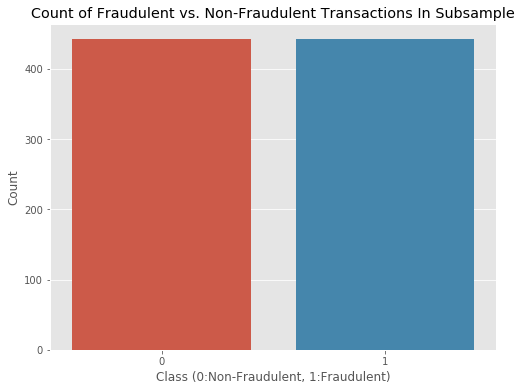

In [26]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [27]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.413
V2,0.474
V3,-0.570
V4,0.703
V5,-0.360
V6,-0.379
V7,-0.475
V8,0.059
V9,-0.557
V10,-0.623


In [28]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.570
V9,-0.557
V10,-0.623
V12,-0.679
V14,-0.752
V16,-0.590
V17,-0.553


In [29]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.703
V11,0.676
Class,1.000


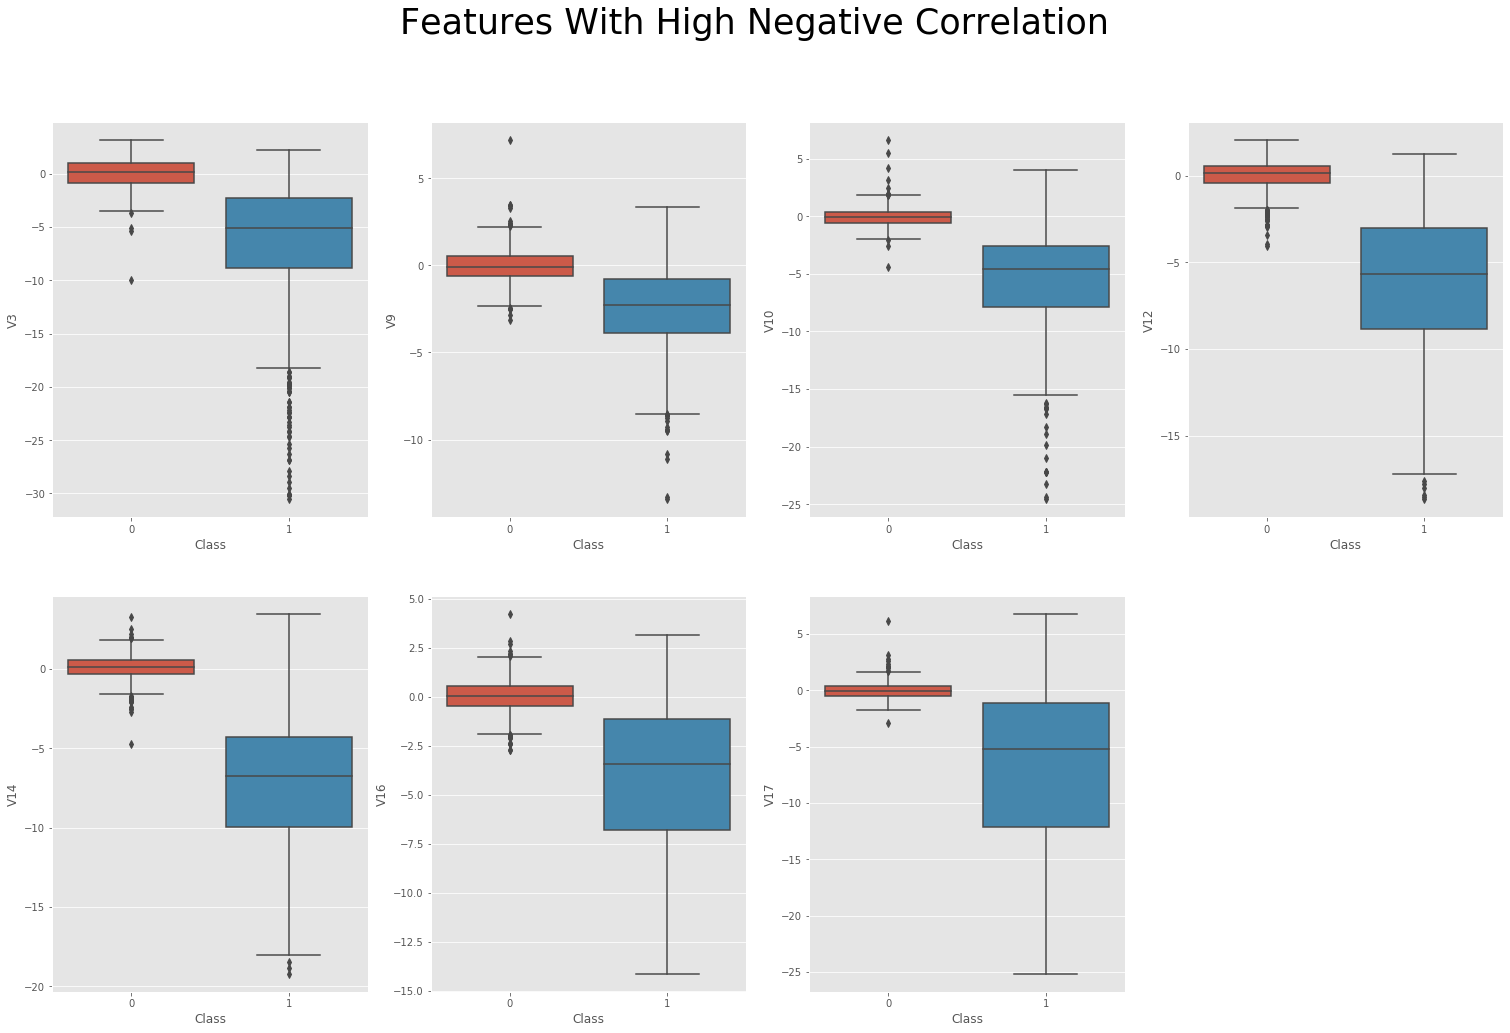

In [30]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

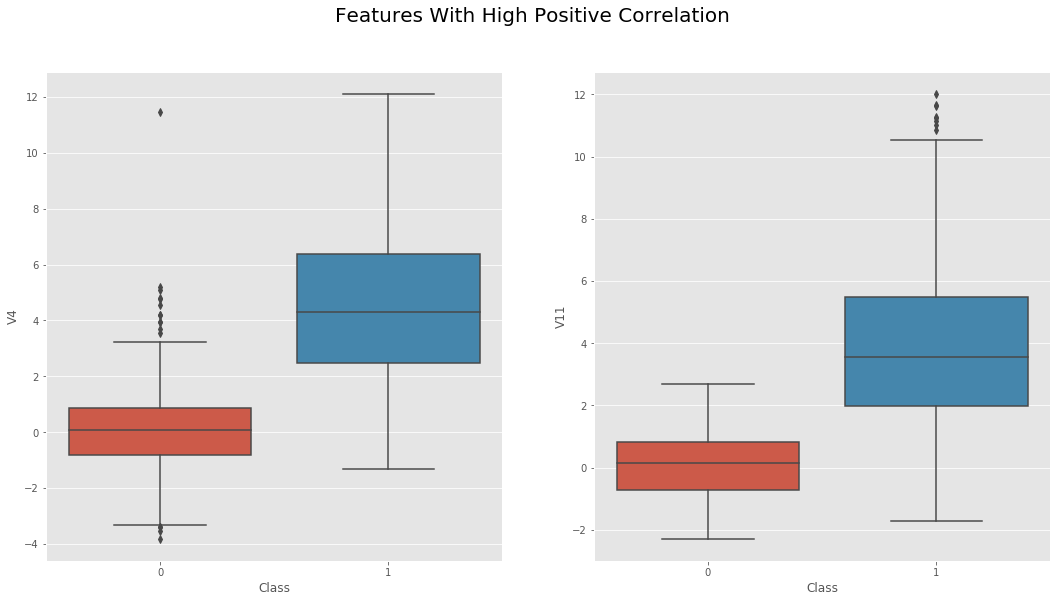

In [31]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [0]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [33]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 884 transactions by 278 transactions to 606 transactions.


**Dimensionality Reduction**

In [0]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [0]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

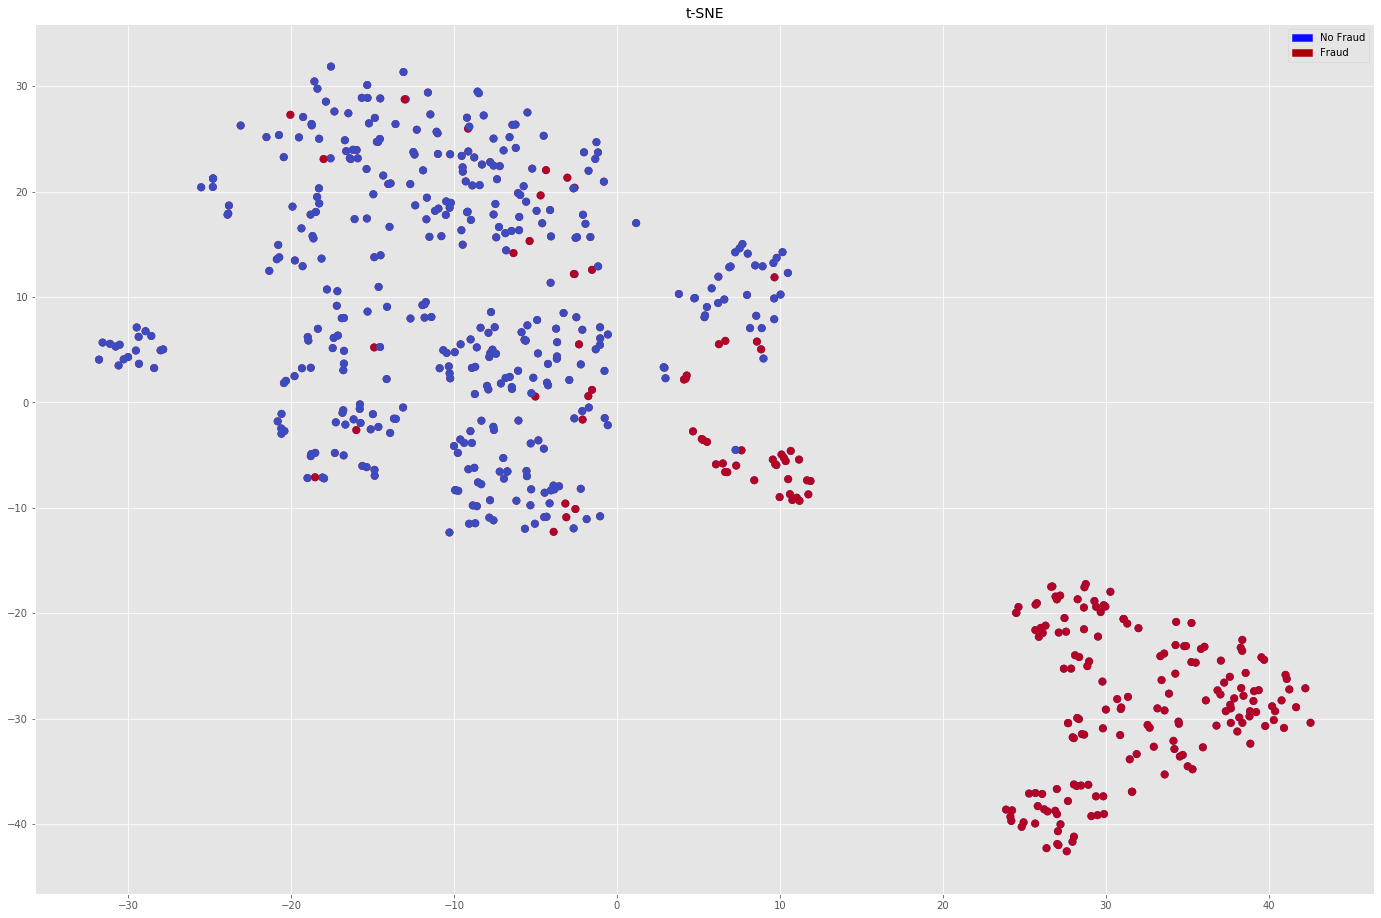

In [36]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [40]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (484, 30) (122, 30) 

Y_shapes:
 Y_train: Y_validation:
 (484,) (122,)


In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [42]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966128 (0.029778)
LDA: 0.964311 (0.033925)
KNN: 0.944576 (0.029473)
CART: 0.902750 (0.043043)
SVM: 0.956164 (0.027655)
XGB: 0.971956 (0.020923)
RF: 0.955619 (0.022894)


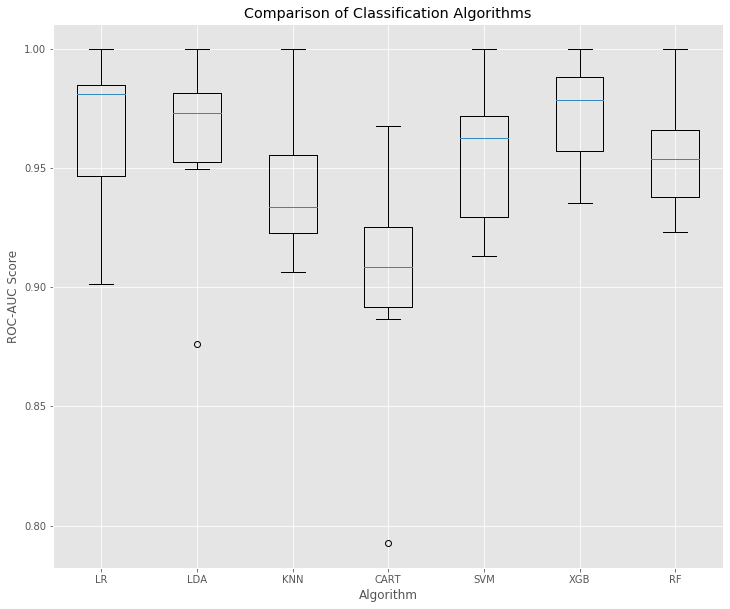

In [43]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [0]:

metrics=pd.DataFrame(index=["accuracy","recall","precision"],columns=["LogReg","XGB","RandomForest","naivebayes"])

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression 
 #instance
ls=LogisticRegression(n_jobs=-1,random_state=15)
 # Train the model
ls.fit(X_train, y_train)
 # Model Results
y_pred = ls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['LogReg', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
CM=confusion_matrix(y_test,y_pred)
print(CM)
print(model_results)


[[69  2]
 [ 8 43]]
    Model  Accuracy  Precision  Recall  F1 Score
0  LogReg     0.918      0.956   0.843     0.896


In [46]:
from sklearn.ensemble import RandomForestClassifier
classifierr = RandomForestClassifier(random_state = 0, n_estimators = 100,criterion = 'entropy')
classifierr.fit(X_train, y_train)
y_pred = classifierr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(model_results)

                   Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest (n=100)     0.926        1.0   0.824     0.903


In [0]:
inp={'V1':-1.359807,'V2':0.072781,'V3':0.072781,'V4':2.536346,'V5':1.378155,'V6':-0.3832,'V7':1.462387,
     'V8':0.239598,'V9':0.098697,'V10':0.363786,'V11':0.090794,
       'V12':0.551599,'V13':0.617800,'V14':0.991389,'V15':-0.311169,'V16':0.468176,'V17':0.470400,
     'V18':0.207971,'V19':0.02579,'V20':0.40399,'V21':0.251412,
       'V22':1.8306,'V23':1,'V24':1,'V25':0.066928,'V26':0.128539,'V27':0.189114,'V28':0.133558,
       'normalizedAmount':0.44964,'time':99000}
a_input=pd.DataFrame(inp,index=[0],columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'normalizedAmount','time']) 

In [48]:
pred = ls.predict(a_input)
val = pred[0]
if val >= 0:
    print("Genuine")
else:
    print("Fraud")

Genuine


In [49]:
user_input={}
for var in X:
  temp=input("Enter"+var+":")
  user_input[var]=temp
user_df=pd.DataFrame(user_input,index=[0],columns=X)
result=user_df.any(axis=0)
trans=ls.predict(result)
val2=trans[0]
if val2 > 0:
    print("Genuine")
else:
    print("Fraud")    

EnterV1:-0.646
EnterV2:1.470
EnterV3:1.931
EnterV4:4.327
EnterV5:-0.272
EnterV6:1.366
EnterV7:-0.238
EnterV8:0.531
EnterV9:-1.289
EnterV10:1.527
EnterV11:-1.487
EnterV12:-1.396
EnterV13:-0.939
EnterV14:0.129
EnterV15:1.203
EnterV16:0.437
EnterV17:0.056
EnterV18:0.600
EnterV19:1.105
EnterV20:0.055
EnterV21:0.006
EnterV22:-0.032
EnterV23:0.054
EnterV24:6.619e-01
EnterV25:-0.794
EnterV26:0.113
EnterV27:-0.338
EnterV28:-0.113
Enterscaled_amount:34.04
Enterscaled_time:1.363


ValueError: ignored